In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = 'DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [3]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [5]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [6]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [7]:
# Duplicated
df.duplicated().sum()

14342

In [8]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

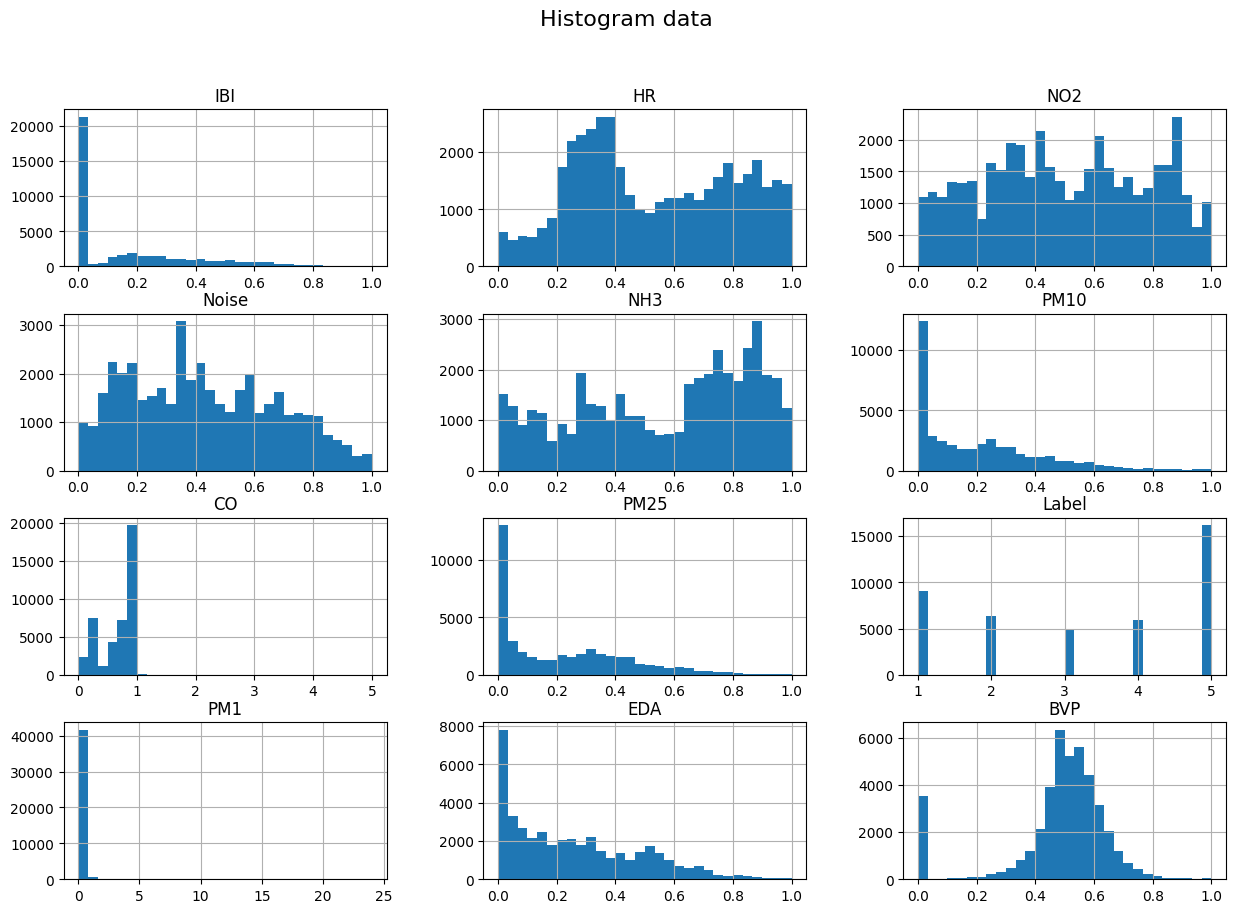

In [9]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [10]:
df.shape

(42436, 12)

C:\Users\Ryan\AppData\Local\Temp\ipykernel_27004\3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


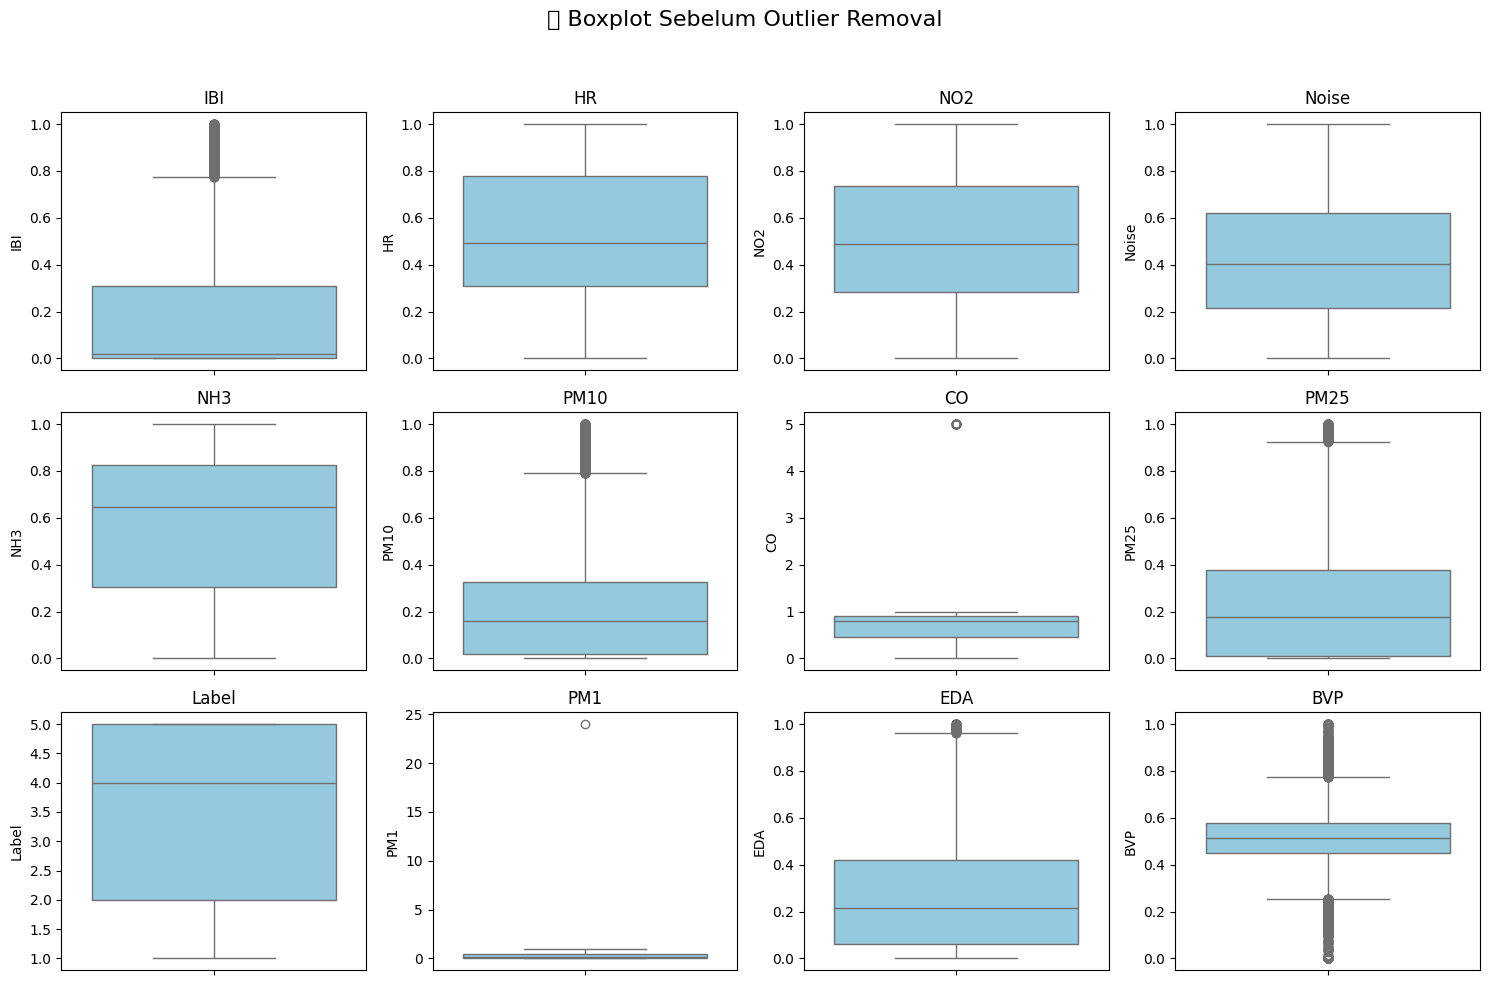

In [11]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [12]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [13]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


C:\Users\Ryan\AppData\Local\Temp\ipykernel_27004\230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


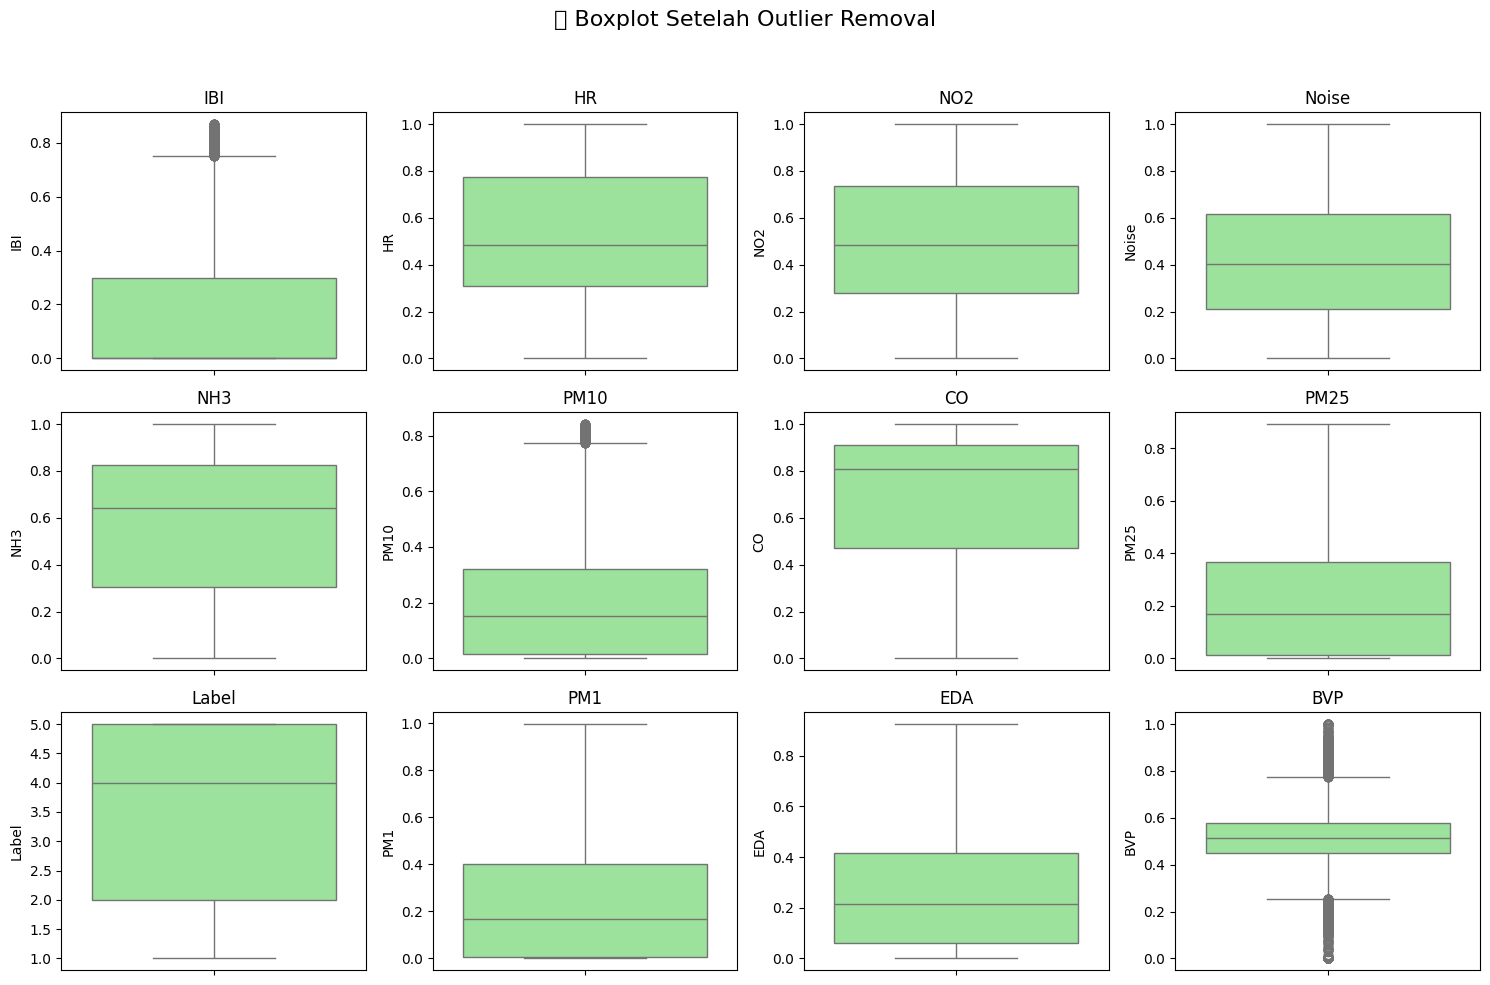

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


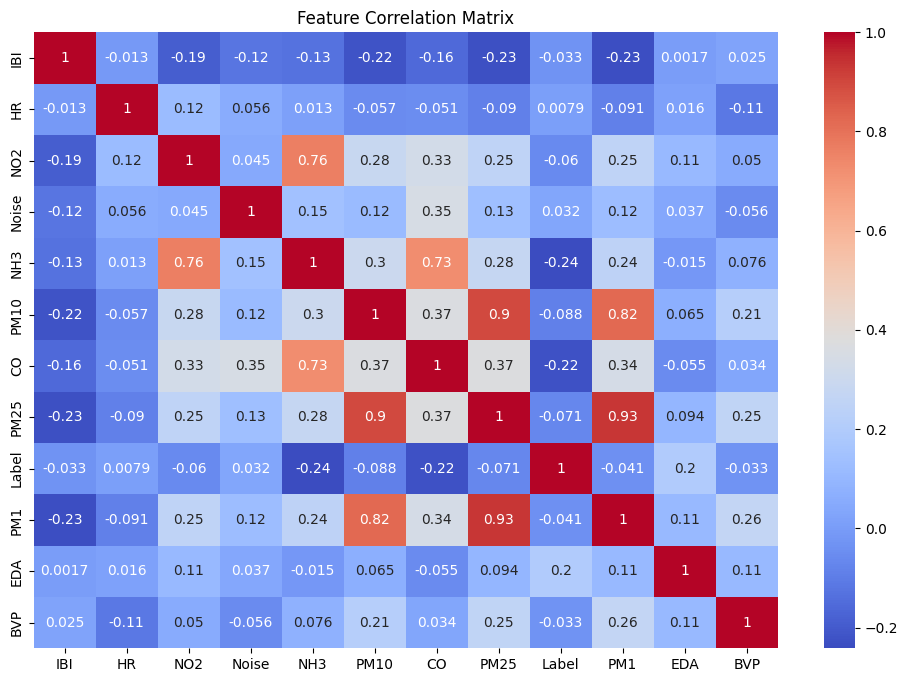

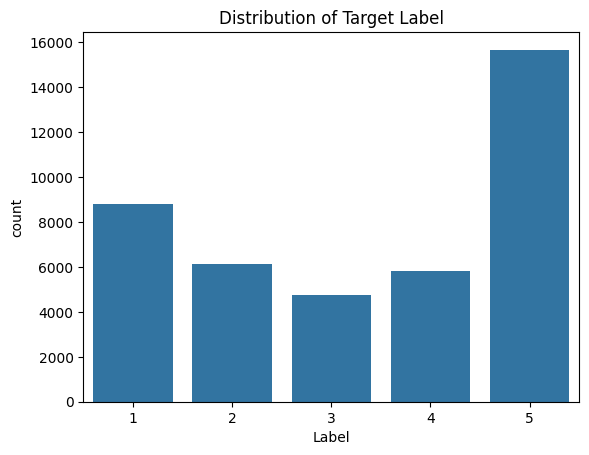

In [15]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [16]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [17]:
print(X.info())
print(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 0 to 42435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     41189 non-null  float64
 1   HR      41189 non-null  float64
 2   NO2     41189 non-null  float64
 3   Noise   41189 non-null  float64
 4   NH3     41189 non-null  float64
 5   PM10    41189 non-null  float64
 6   CO      41189 non-null  float64
 7   PM25    41189 non-null  float64
 8   PM1     41189 non-null  float64
 9   EDA     41189 non-null  float64
 10  BVP     41189 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB
None
Label
5    15671
1     8805
2     6137
4     5835
3     4741
Name: count, dtype: int64


## Prepocessing

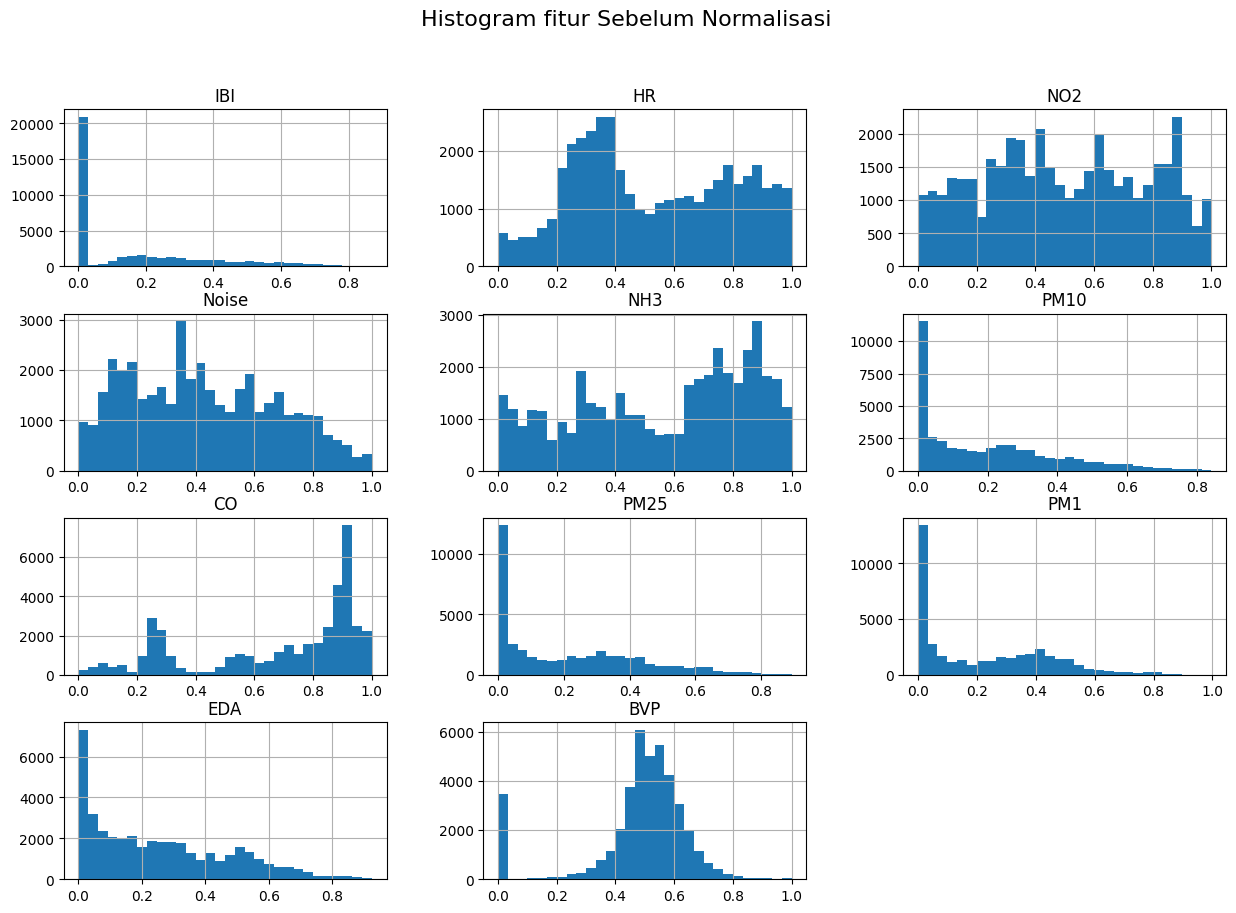

In [18]:
# Histogram sebelum normalisasi
X.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
# Split data menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (32951, 11)
Data Test after normalisation = (8238, 11)


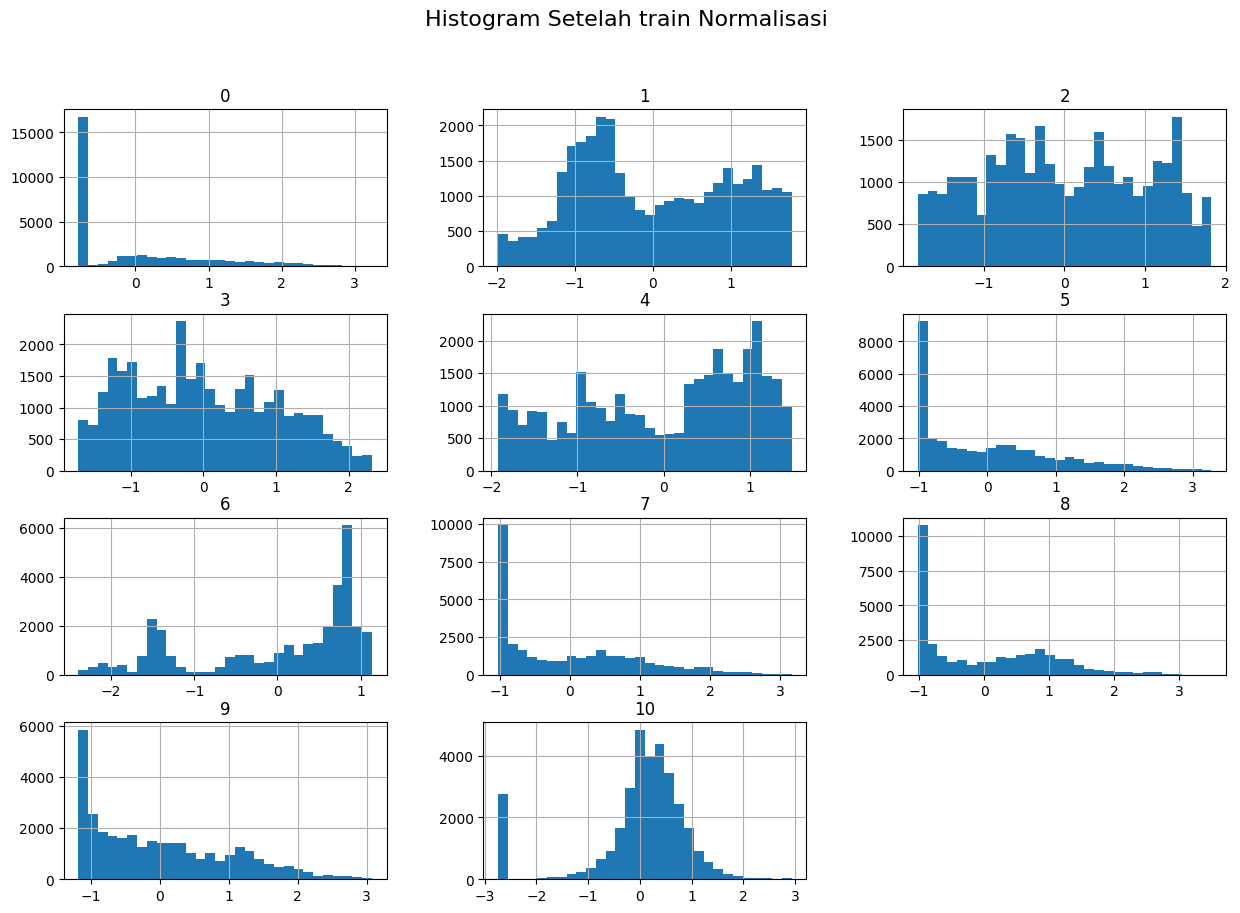

In [21]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

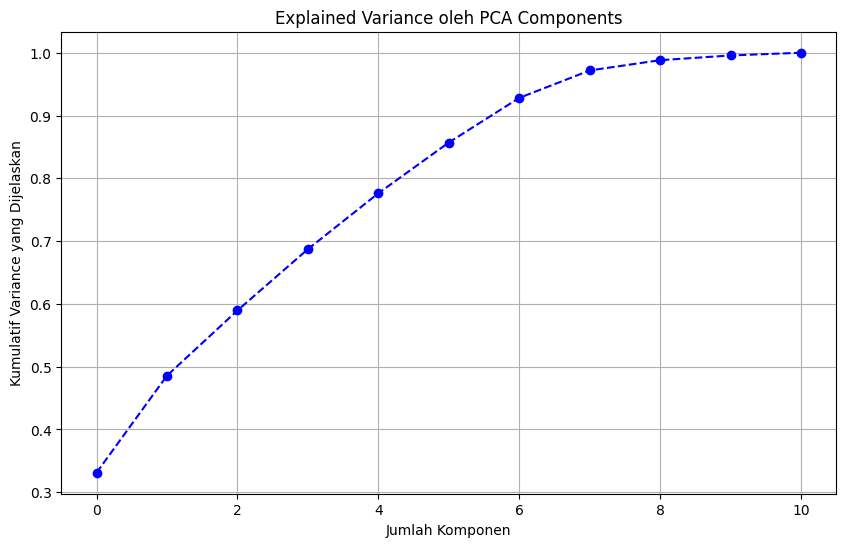

In [22]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [23]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3311 variance terjelaskan
Komponen ke-2: 0.4856 variance terjelaskan
Komponen ke-3: 0.5895 variance terjelaskan
Komponen ke-4: 0.6871 variance terjelaskan
Komponen ke-5: 0.7761 variance terjelaskan
Komponen ke-6: 0.8569 variance terjelaskan
Komponen ke-7: 0.9280 variance terjelaskan
Komponen ke-8: 0.9717 variance terjelaskan
Komponen ke-9: 0.9881 variance terjelaskan
Komponen ke-10: 0.9956 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [30]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 7)
Shape test PCA: (8238, 7)


## Training Data

In [ ]:
# import pandas as pd

# # Base (data sebelum normalisasi dan PCA)
# print("\n=== X_train (original) ===")
# print(pd.DataFrame(X_train).head())
# print("Shape:", X_train.shape)

# print("\n=== X_test (original) ===")
# print(pd.DataFrame(X_test).head())
# print("Shape:", X_test.shape)

# print("\n=== y_train ===")
# print(y_train.head())
# print("Shape:", y_train.shape)

# print("\n=== y_test ===")
# print(y_test.head())
# print("Shape:", y_test.shape)

# # Normalisasi
# print("\n=== X_train_pca (StandardScaler) ===")
# print(pd.DataFrame(X_train_pca).head())
# print("Shape:", X_train_pca.shape)
# # print("\n=== X_train_scaled (StandardScaler) ===")
# # print(pd.DataFrame(X_train_scaled).head())
# # print("Shape:", X_train_scaled.shape)

# print("\n=== X_test_pca (StandardScaler) ===")
# print(pd.DataFrame(X_test_pca).head())
# print("Shape:", X_test_pca.shape)
# # print("\n=== X_test_scaled (StandardScaler) ===")
# # print(pd.DataFrame(X_test_scaled).head())
# # print("Shape:", X_test_scaled.shape)

# # PCA
# print("\n=== X_train_pca (7 komponen) ===")
# print(pd.DataFrame(X_train_pca).head())
# print("Shape:", X_train_pca.shape)

# print("\n=== X_test_pca (7 komponen) ===")
# print(pd.DataFrame(X_test_pca).head())
# print("Shape:", X_test_pca.shape)



=== X_train (original) ===
            IBI        HR       NO2     Noise       NH3      PM10        CO  \
12977  0.517128  0.284415  0.246611  0.872229  0.646159  0.345026  0.898817   
36584  0.000000  0.357652  0.821985  0.175064  0.959080  0.430619  0.895364   
31525  0.243961  0.635042  0.419748  0.063829  0.327104  0.072655  0.258582   
18438  0.319215  0.717958  0.208520  0.736786  0.664228  0.075351  0.937006   
3484   0.000000  0.481332  0.370370  0.517397  0.299558  0.239023  0.768162   

           PM25       PM1       EDA       BVP  
12977  0.611319  0.791895  0.201958  0.428074  
36584  0.298246  0.386150  0.008619  0.868089  
31525  0.072655  0.000000  0.210157  0.503498  
18438  0.074013  0.072675  0.675412  0.514364  
3484   0.314064  0.351411  0.393351  0.467247  
Shape: (32951, 11)

=== X_test (original) ===
            IBI        HR       NO2     Noise       NH3      PM10        CO  \
33888  0.464765  0.917253  0.888889  0.426341  0.912133  0.764368  0.887449   
3338 

In [28]:
X_train

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,PM1,EDA,BVP
12977,0.517128,0.284415,0.246611,0.872229,0.646159,0.345026,0.898817,0.611319,0.791895,0.201958,0.428074
36584,0.000000,0.357652,0.821985,0.175064,0.959080,0.430619,0.895364,0.298246,0.386150,0.008619,0.868089
31525,0.243961,0.635042,0.419748,0.063829,0.327104,0.072655,0.258582,0.072655,0.000000,0.210157,0.503498
18438,0.319215,0.717958,0.208520,0.736786,0.664228,0.075351,0.937006,0.074013,0.072675,0.675412,0.514364
3484,0.000000,0.481332,0.370370,0.517397,0.299558,0.239023,0.768162,0.314064,0.351411,0.393351,0.467247
...,...,...,...,...,...,...,...,...,...,...,...
6494,0.113168,0.784079,0.793854,0.802013,0.783663,0.442895,0.990080,0.619560,0.625204,0.290364,0.519821
11686,0.000000,0.610305,0.255343,0.239129,0.662175,0.322216,0.897887,0.556767,0.715843,0.569527,0.568792
39345,0.487289,0.196632,0.048863,0.368528,0.043536,0.152866,0.237665,0.270849,0.281952,0.102710,0.428210
871,0.000000,0.840330,0.673244,0.641620,0.571058,0.051921,0.513374,0.051921,0.034614,0.000000,0.000000


In [27]:
X_train_scaled

array([[ 1.60944437, -0.91542406, -0.91739019, ...,  2.57032785,
        -0.25103241, -0.31225549],
       [-0.78335489, -0.6396951 ,  1.17509062, ...,  0.73212195,
        -1.1410928 ,  2.18308467],
       [ 0.34547401,  0.40464683, -0.28773589, ..., -1.01730581,
        -0.21329076,  0.11547779],
       ...,
       [ 1.47137717, -1.24591447, -1.63654354, ...,  0.26006124,
        -0.70793475, -0.31148449],
       [-0.78335489,  1.17753193,  0.6341612 , ..., -0.86049055,
        -1.1807717 , -2.73987842],
       [-0.78335489, -0.90911803,  1.22850053, ...,  1.80637601,
        -1.05999396,  1.17592438]])


🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1758
           2       0.99      0.96      0.98      1224
           3       0.97      0.98      0.97       928
           4       0.98      0.97      0.98      1141
           5       0.98      0.99      0.99      3187

    accuracy                           0.98      8238
   macro avg       0.98      0.98      0.98      8238
weighted avg       0.98      0.98      0.98      8238



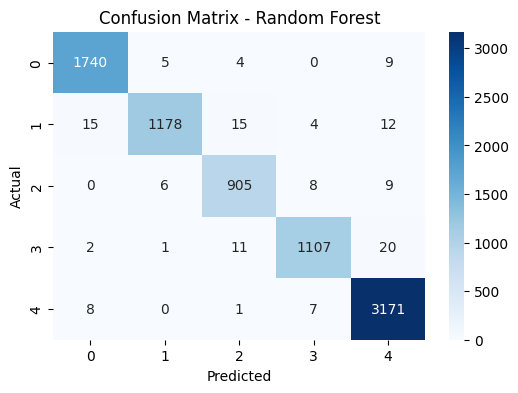


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.96      0.97      0.96      1758
           2       0.95      0.93      0.94      1224
           3       0.91      0.91      0.91       928
           4       0.92      0.94      0.93      1141
           5       0.98      0.98      0.98      3187

    accuracy                           0.96      8238
   macro avg       0.94      0.94      0.94      8238
weighted avg       0.96      0.96      0.96      8238



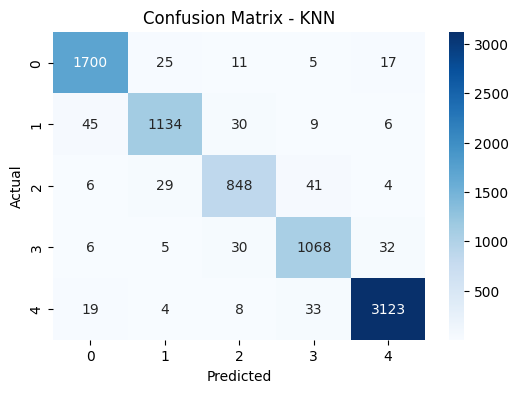


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.37      0.66      0.48      1758
           2       0.41      0.61      0.49      1224
           3       0.16      0.03      0.06       928
           4       0.29      0.19      0.23      1141
           5       0.55      0.41      0.47      3187

    accuracy                           0.42      8238
   macro avg       0.36      0.38      0.34      8238
weighted avg       0.41      0.42      0.39      8238



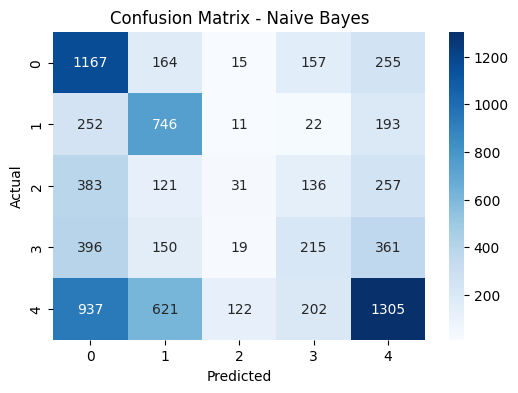


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      1758
           2       0.96      0.96      0.96      1224
           3       0.96      0.97      0.96       928
           4       0.97      0.96      0.96      1141
           5       0.98      0.98      0.98      3187

    accuracy                           0.97      8238
   macro avg       0.97      0.97      0.97      8238
weighted avg       0.97      0.97      0.97      8238



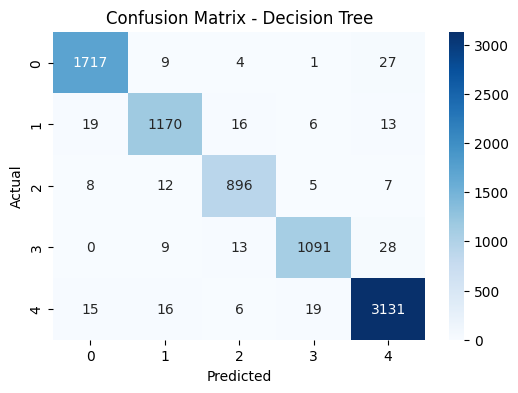


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.983370   0.982047  0.978515  0.980224
KNN            0.955693   0.944938  0.944642  0.944754
Naive Bayes    0.420490   0.357383  0.380922  0.344860
Decision Tree  0.971716   0.969112  0.967337  0.968204


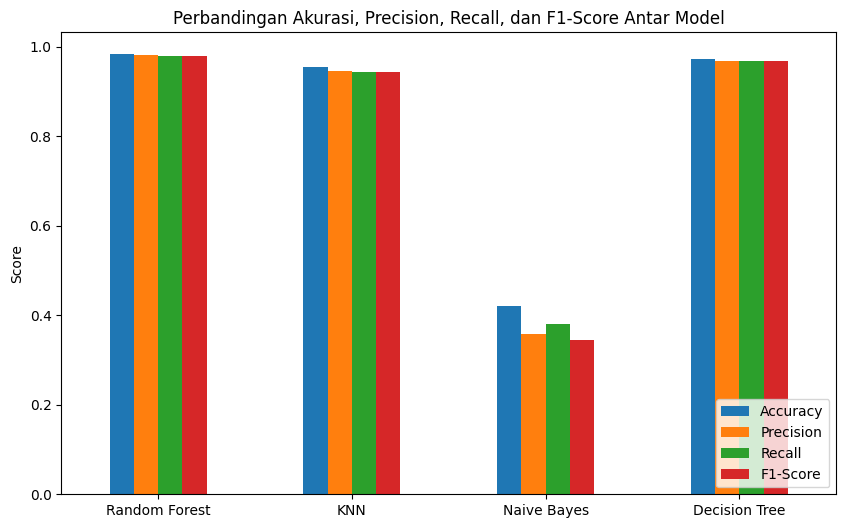

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Buat dictionary model
# models = {
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "KNN": KNeighborsClassifier(n_neighbors=5),
#     "Naive Bayes": GaussianNB()
# }

# # Dictionary untuk simpan hasil evaluasi
# results = {}

# for name, model in models.items():
#     print(f"\n🔹 Training {name}...")
    
#     # Training
#     ## Normalisasi
#     model.fit(X_train_scaled, y_train)
#     ##Sebelum normalisasi
#     # model.fit(X_train, y_train)
    
#     # Prediction
#     ## Normalisasi
#     y_pred = model.predict(X_test_scaled)
#     ##Sebelum normalisasi
#     # y_pred = model.predict(X_test)
    
#     # Evaluasi
#     report = classification_report(y_test, y_pred, output_dict=True)
    
#     # Simpan hasil utama (macro avg agar balance antar kelas)
#     results[name] = {
#         "Accuracy": report["accuracy"],
#         "Precision": report["macro avg"]["precision"],
#         "Recall": report["macro avg"]["recall"],
#         "F1-Score": report["macro avg"]["f1-score"]
#     }
    
#     # Tampilkan laporan lengkap
#     print(f"\nClassification Report ({name}):")
#     print(classification_report(y_test, y_pred))
    
#     # Confusion Matrix
#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure(figsize=(6,4))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
#     plt.title(f"Confusion Matrix - {name}")
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.show()

# # Tampilkan perbandingan hasil dalam bentuk tabel
# df_results = pd.DataFrame(results).T
# print("\n📊 Perbandingan Model:")
# print(df_results)

# # Visualisasi perbandingan
# df_results.plot(kind="bar", figsize=(10,6))
# plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
# plt.ylabel("Score")
# plt.xticks(rotation=0)
# plt.legend(loc="lower right")
# plt.show()


🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1758
           2       0.99      0.96      0.98      1224
           3       0.97      0.98      0.97       928
           4       0.98      0.97      0.98      1141
           5       0.98      0.99      0.99      3187

    accuracy                           0.98      8238
   macro avg       0.98      0.98      0.98      8238
weighted avg       0.98      0.98      0.98      8238



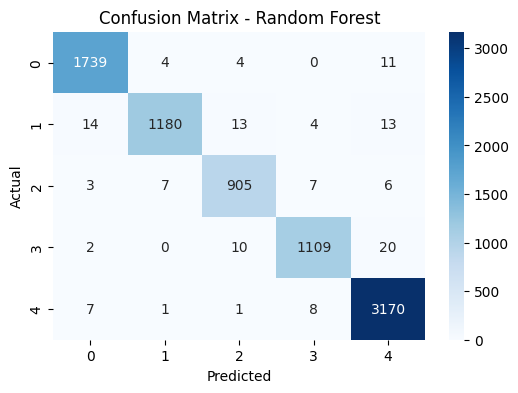


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      1758
           2       0.96      0.96      0.96      1224
           3       0.96      0.97      0.96       928
           4       0.97      0.96      0.96      1141
           5       0.98      0.98      0.98      3187

    accuracy                           0.97      8238
   macro avg       0.97      0.97      0.97      8238
weighted avg       0.97      0.97      0.97      8238



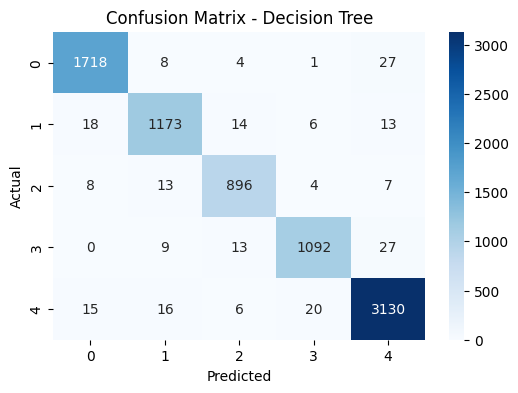


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.95      0.96      0.96      1758
           2       0.93      0.92      0.93      1224
           3       0.91      0.90      0.90       928
           4       0.92      0.93      0.92      1141
           5       0.98      0.97      0.97      3187

    accuracy                           0.95      8238
   macro avg       0.94      0.94      0.94      8238
weighted avg       0.95      0.95      0.95      8238



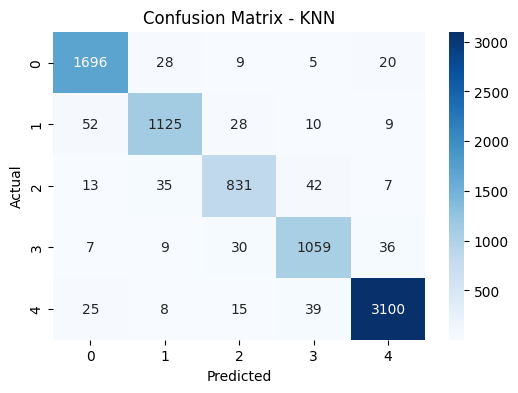


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.37      0.66      0.48      1758
           2       0.41      0.61      0.49      1224
           3       0.16      0.03      0.06       928
           4       0.29      0.19      0.23      1141
           5       0.55      0.41      0.47      3187

    accuracy                           0.42      8238
   macro avg       0.36      0.38      0.34      8238
weighted avg       0.41      0.42      0.39      8238



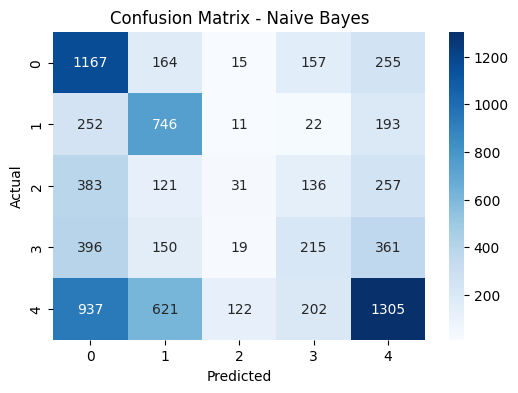


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.983613   0.982564  0.979016  0.980742
Decision Tree  0.972202   0.969720  0.968054  0.968871
KNN            0.948167   0.936776  0.936032  0.936354
Naive Bayes    0.420490   0.357383  0.380922  0.344860


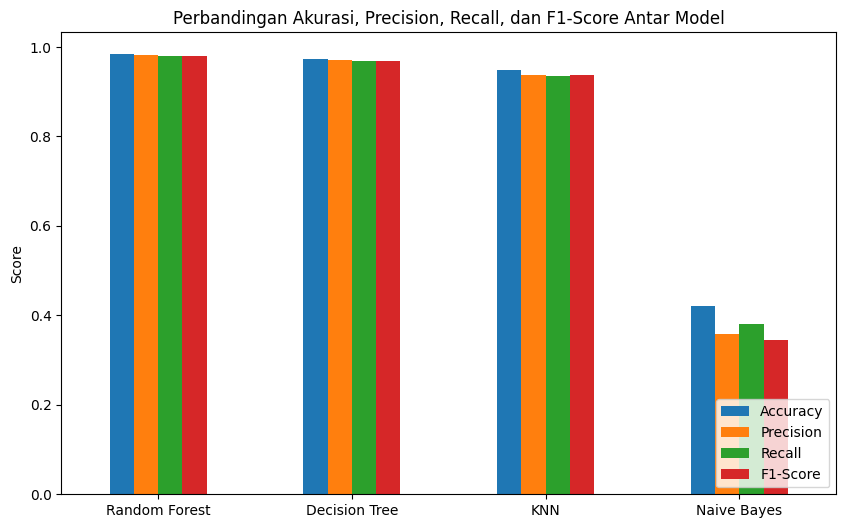

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_scaled, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_scaled)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 7

In [42]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 7)
Shape test PCA: (8238, 7)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1758
           2       0.97      0.93      0.95      1224
           3       0.94      0.92      0.93       928
           4       0.94      0.91      0.93      1141
           5       0.95      0.98      0.96      3187

    accuracy                           0.95      8238
   macro avg       0.95      0.94      0.95      8238
weighted avg       0.95      0.95      0.95      8238



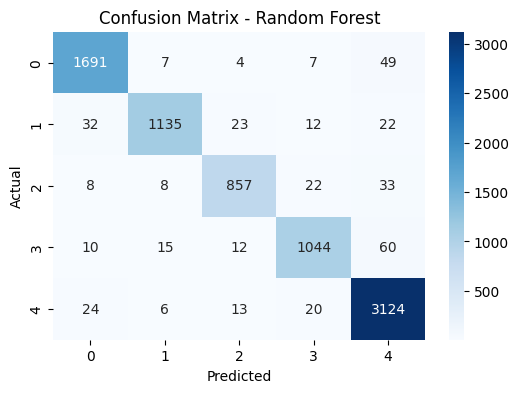


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.93      0.92      0.93      1758
           2       0.91      0.90      0.90      1224
           3       0.87      0.87      0.87       928
           4       0.86      0.88      0.87      1141
           5       0.94      0.94      0.94      3187

    accuracy                           0.91      8238
   macro avg       0.90      0.90      0.90      8238
weighted avg       0.91      0.91      0.91      8238



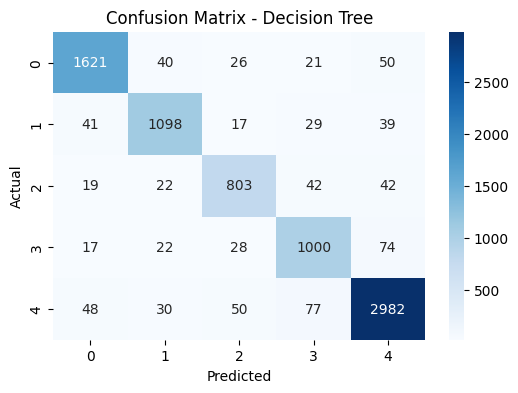


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.93      0.95      0.94      1758
           2       0.93      0.92      0.92      1224
           3       0.89      0.88      0.88       928
           4       0.90      0.89      0.90      1141
           5       0.96      0.96      0.96      3187

    accuracy                           0.93      8238
   macro avg       0.92      0.92      0.92      8238
weighted avg       0.93      0.93      0.93      8238



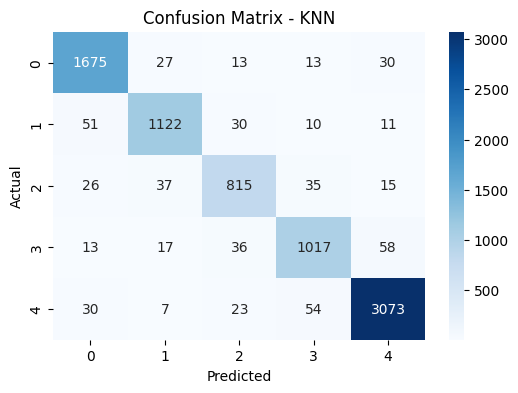


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.47      0.61      0.53      1758
           2       0.56      0.44      0.49      1224
           3       0.41      0.12      0.18       928
           4       0.40      0.10      0.17      1141
           5       0.48      0.66      0.56      3187

    accuracy                           0.48      8238
   macro avg       0.46      0.39      0.38      8238
weighted avg       0.47      0.48      0.44      8238



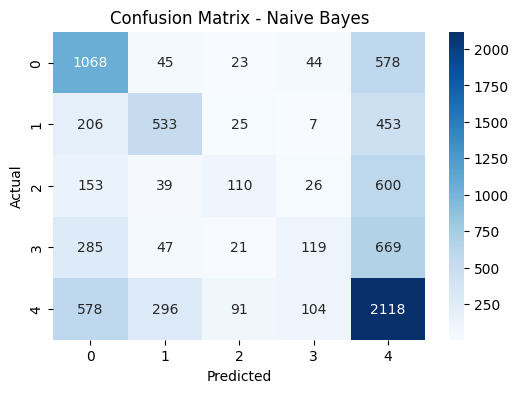


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.953023   0.953009  0.941577  0.947085
Decision Tree  0.910901   0.898901  0.899306  0.899071
KNN            0.934936   0.922843  0.920648  0.921708
Naive Bayes    0.479243   0.461012  0.386074  0.384314


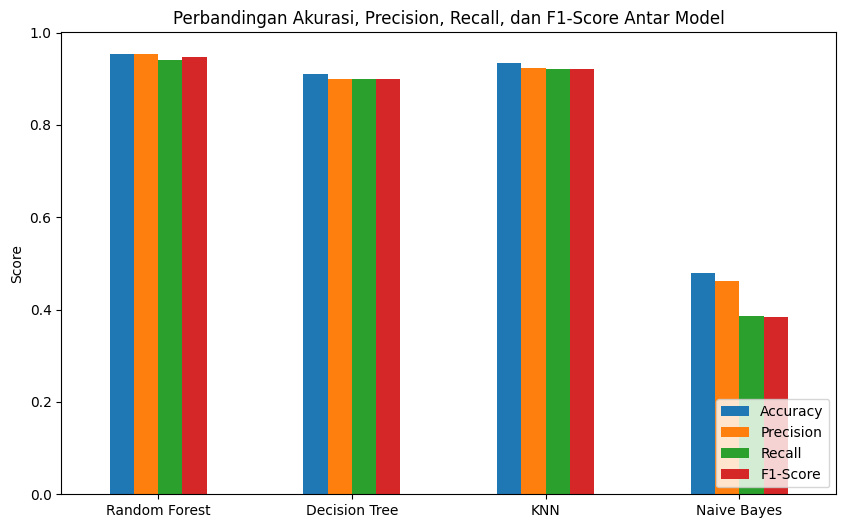

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 6

In [44]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 6)
Shape test PCA: (8238, 6)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.96      0.97      0.96      1758
           2       0.96      0.92      0.94      1224
           3       0.94      0.92      0.93       928
           4       0.94      0.92      0.93      1141
           5       0.95      0.98      0.97      3187

    accuracy                           0.95      8238
   macro avg       0.95      0.94      0.95      8238
weighted avg       0.95      0.95      0.95      8238



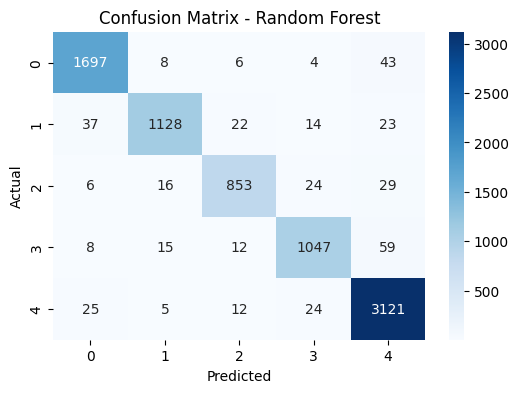


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.93      0.93      0.93      1758
           2       0.92      0.89      0.90      1224
           3       0.87      0.88      0.88       928
           4       0.87      0.89      0.88      1141
           5       0.94      0.94      0.94      3187

    accuracy                           0.92      8238
   macro avg       0.90      0.91      0.90      8238
weighted avg       0.92      0.92      0.92      8238



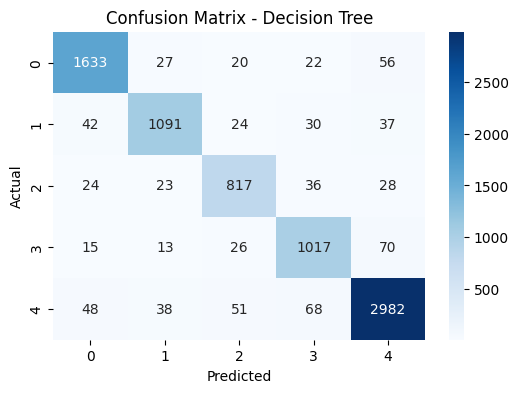


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.93      0.95      0.94      1758
           2       0.93      0.92      0.92      1224
           3       0.90      0.89      0.89       928
           4       0.90      0.90      0.90      1141
           5       0.97      0.96      0.96      3187

    accuracy                           0.94      8238
   macro avg       0.93      0.92      0.92      8238
weighted avg       0.94      0.94      0.94      8238



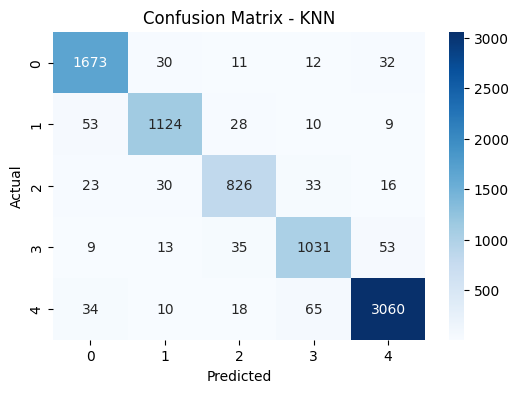


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.45      0.61      0.52      1758
           2       0.55      0.42      0.48      1224
           3       0.39      0.08      0.13       928
           4       0.35      0.04      0.08      1141
           5       0.47      0.68      0.56      3187

    accuracy                           0.47      8238
   macro avg       0.44      0.37      0.35      8238
weighted avg       0.45      0.47      0.42      8238



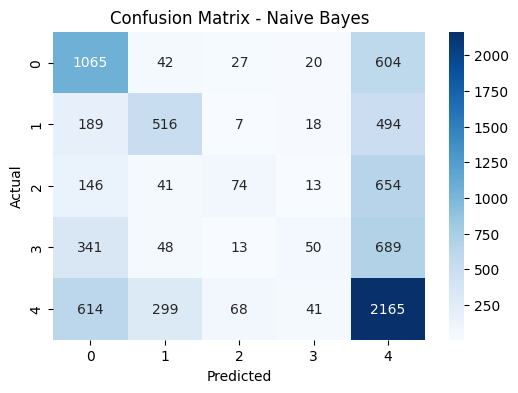


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.952416   0.951162  0.940592  0.945691
Decision Tree  0.915271   0.903974  0.905525  0.904678
KNN            0.936392   0.925131  0.924756  0.924907
Naive Bayes    0.469774   0.442274  0.366051  0.351903


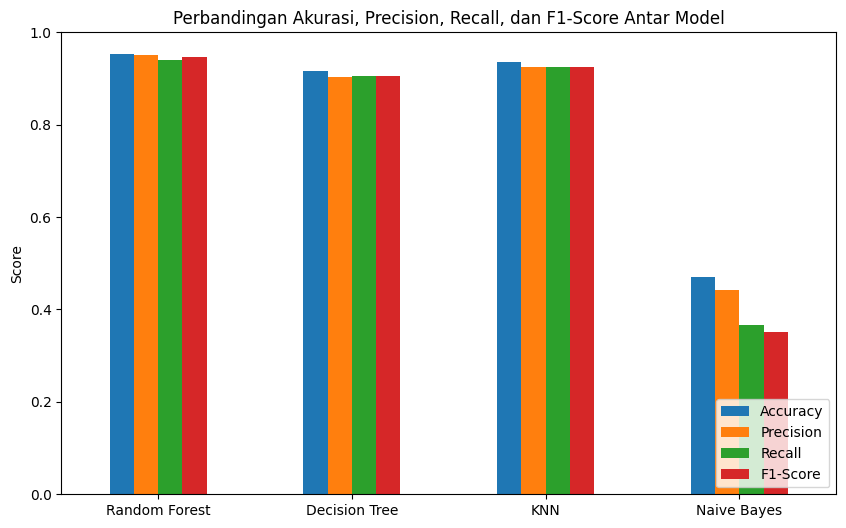

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 5

In [46]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 5)
Shape test PCA: (8238, 5)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.95      0.95      0.95      1758
           2       0.94      0.91      0.93      1224
           3       0.92      0.90      0.91       928
           4       0.93      0.89      0.91      1141
           5       0.94      0.97      0.96      3187

    accuracy                           0.94      8238
   macro avg       0.94      0.93      0.93      8238
weighted avg       0.94      0.94      0.94      8238



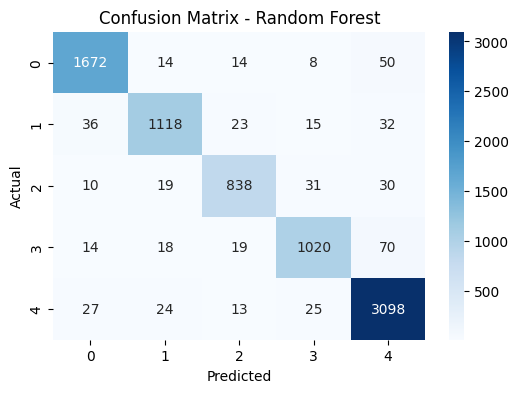


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.90      0.91      0.91      1758
           2       0.87      0.87      0.87      1224
           3       0.87      0.86      0.87       928
           4       0.85      0.87      0.86      1141
           5       0.93      0.92      0.92      3187

    accuracy                           0.90      8238
   macro avg       0.88      0.89      0.89      8238
weighted avg       0.90      0.90      0.90      8238



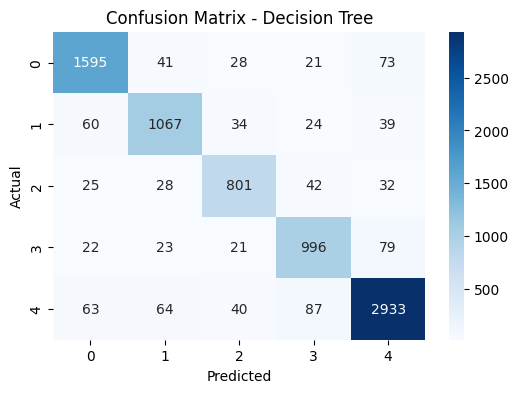


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.91      0.94      0.93      1758
           2       0.90      0.90      0.90      1224
           3       0.87      0.86      0.86       928
           4       0.87      0.86      0.87      1141
           5       0.95      0.94      0.94      3187

    accuracy                           0.91      8238
   macro avg       0.90      0.90      0.90      8238
weighted avg       0.91      0.91      0.91      8238



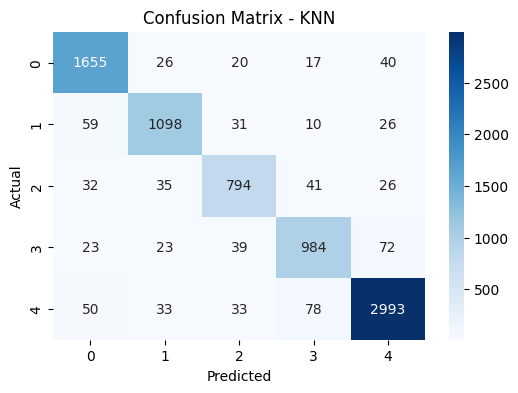


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.41      0.52      0.46      1758
           2       0.47      0.38      0.42      1224
           3       0.48      0.01      0.03       928
           4       0.49      0.07      0.13      1141
           5       0.46      0.69      0.55      3187

    accuracy                           0.45      8238
   macro avg       0.46      0.34      0.32      8238
weighted avg       0.46      0.45      0.39      8238



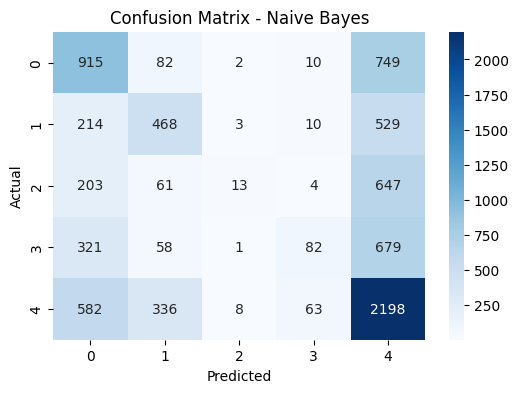


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.940277   0.936845  0.926705  0.931617
Decision Tree  0.897305   0.884727  0.887076  0.885868
KNN            0.913328   0.899652  0.899120  0.899315
Naive Bayes    0.446225   0.459896  0.335677  0.316179


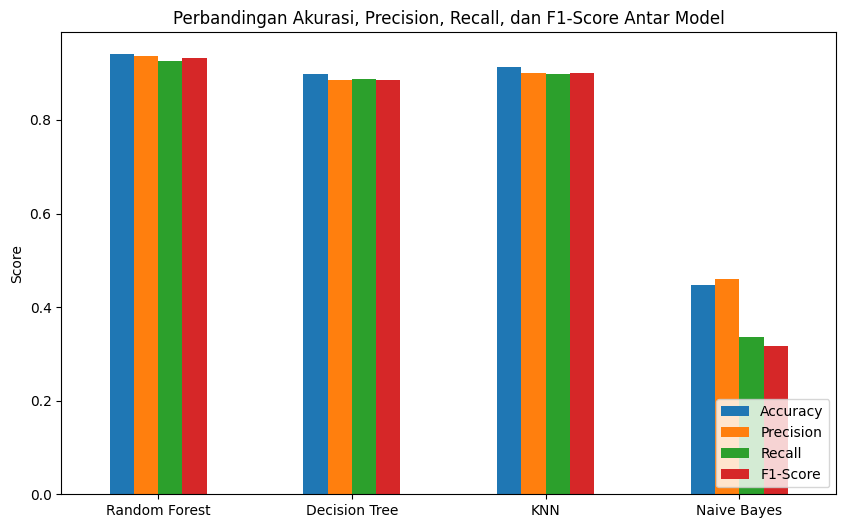

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 4

In [48]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=4)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 4)
Shape test PCA: (8238, 4)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.92      0.92      0.92      1758
           2       0.90      0.89      0.90      1224
           3       0.91      0.86      0.88       928
           4       0.90      0.87      0.88      1141
           5       0.92      0.94      0.93      3187

    accuracy                           0.91      8238
   macro avg       0.91      0.90      0.90      8238
weighted avg       0.91      0.91      0.91      8238



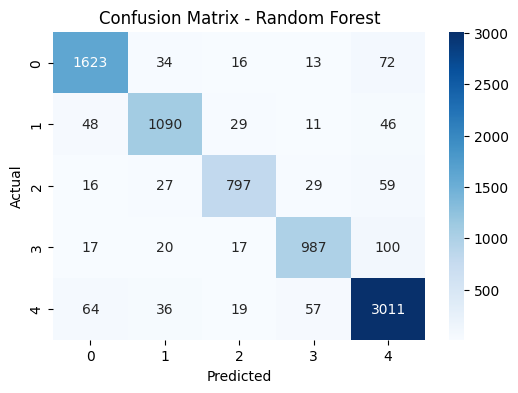


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.89      0.88      0.89      1758
           2       0.85      0.86      0.86      1224
           3       0.83      0.83      0.83       928
           4       0.83      0.84      0.83      1141
           5       0.91      0.91      0.91      3187

    accuracy                           0.88      8238
   macro avg       0.86      0.86      0.86      8238
weighted avg       0.88      0.88      0.88      8238



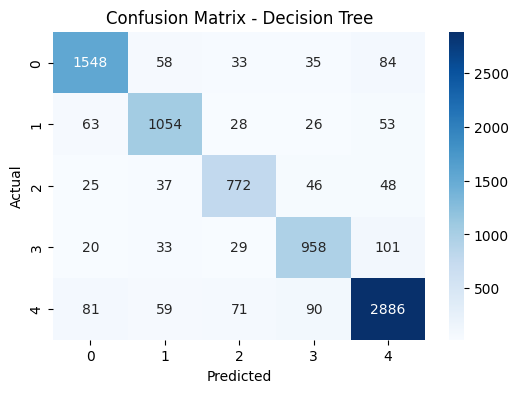


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.85      0.90      0.87      1758
           2       0.84      0.87      0.85      1224
           3       0.81      0.78      0.79       928
           4       0.84      0.80      0.82      1141
           5       0.91      0.90      0.90      3187

    accuracy                           0.87      8238
   macro avg       0.85      0.85      0.85      8238
weighted avg       0.87      0.87      0.87      8238



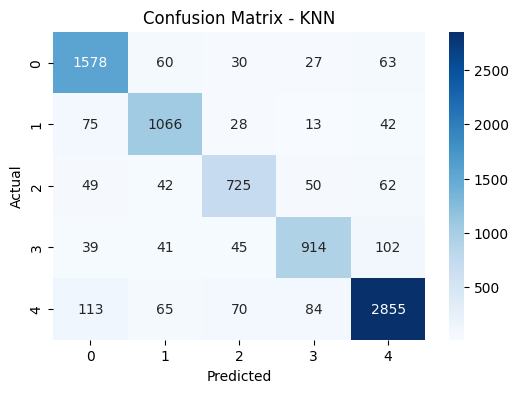


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.39      0.52      0.44      1758
           2       0.39      0.19      0.25      1224
           3       0.00      0.00      0.00       928
           4       0.11      0.01      0.01      1141
           5       0.45      0.74      0.56      3187

    accuracy                           0.43      8238
   macro avg       0.27      0.29      0.25      8238
weighted avg       0.33      0.43      0.35      8238



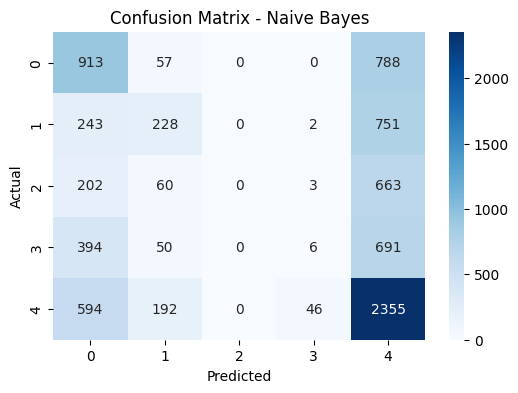


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.911386   0.908856  0.896475  0.902406
Decision Tree  0.876184   0.861444  0.863744  0.862571
KNN            0.866472   0.849837  0.849331  0.849238
Naive Bayes    0.425103   0.266319  0.289963  0.253026


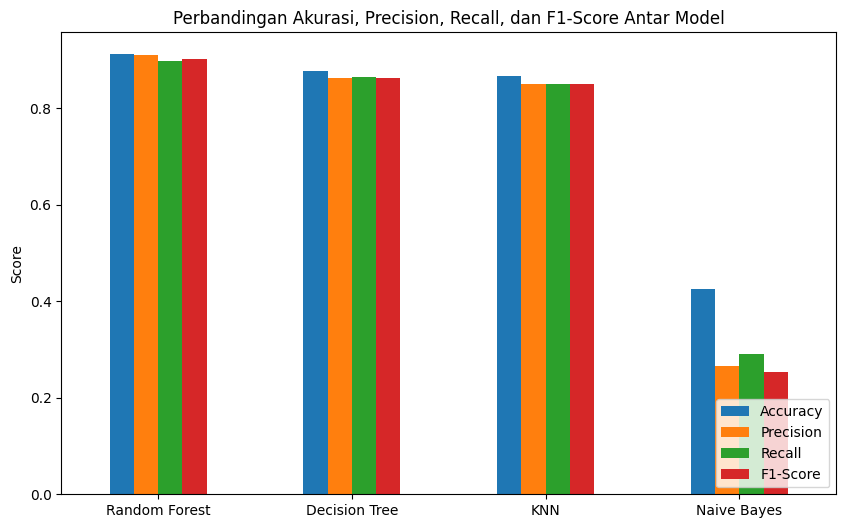

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 3

In [50]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=3)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 3)
Shape test PCA: (8238, 3)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.83      0.85      0.84      1758
           2       0.84      0.81      0.82      1224
           3       0.82      0.75      0.78       928
           4       0.84      0.77      0.80      1141
           5       0.84      0.89      0.86      3187

    accuracy                           0.83      8238
   macro avg       0.83      0.81      0.82      8238
weighted avg       0.83      0.83      0.83      8238



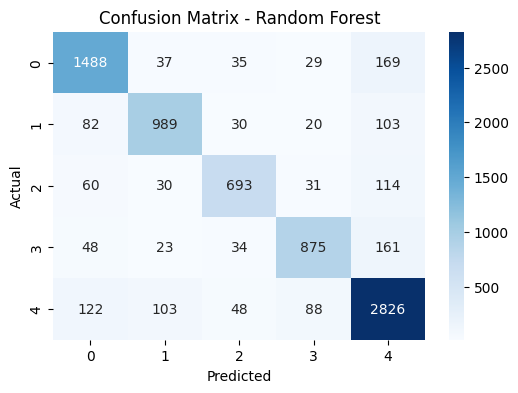


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.82      0.82      0.82      1758
           2       0.78      0.78      0.78      1224
           3       0.77      0.73      0.75       928
           4       0.76      0.78      0.77      1141
           5       0.84      0.84      0.84      3187

    accuracy                           0.81      8238
   macro avg       0.79      0.79      0.79      8238
weighted avg       0.81      0.81      0.81      8238



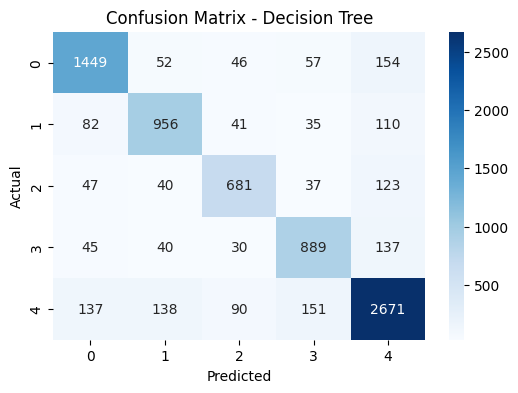


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.68      0.77      0.73      1758
           2       0.71      0.74      0.73      1224
           3       0.64      0.62      0.63       928
           4       0.68      0.60      0.64      1141
           5       0.80      0.77      0.78      3187

    accuracy                           0.73      8238
   macro avg       0.70      0.70      0.70      8238
weighted avg       0.73      0.73      0.72      8238



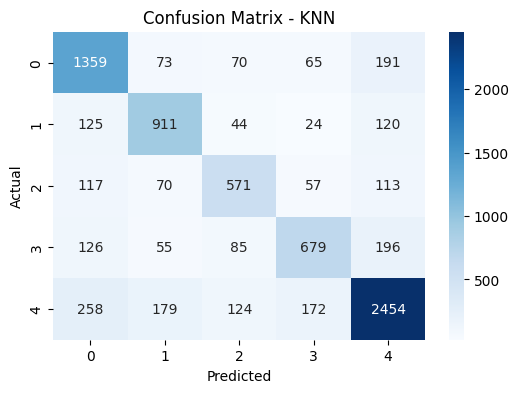


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.38      0.47      0.42      1758
           2       0.51      0.18      0.26      1224
           3       0.00      0.00      0.00       928
           4       0.30      0.03      0.05      1141
           5       0.42      0.74      0.54      3187

    accuracy                           0.41      8238
   macro avg       0.32      0.28      0.25      8238
weighted avg       0.36      0.41      0.34      8238



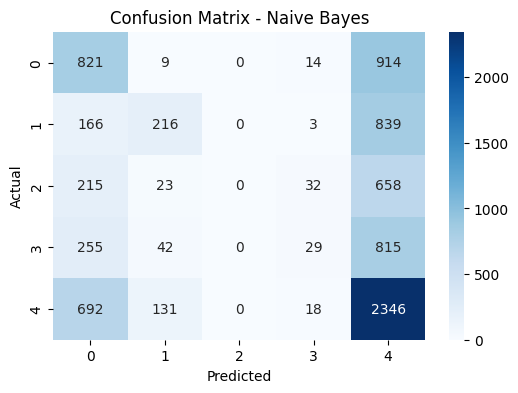


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.834062   0.833028  0.810958  0.821068
Decision Tree  0.806749   0.793286  0.791269  0.792182
KNN            0.725176   0.701997  0.699543  0.699466
Naive Bayes    0.414178   0.323644  0.281002  0.253090


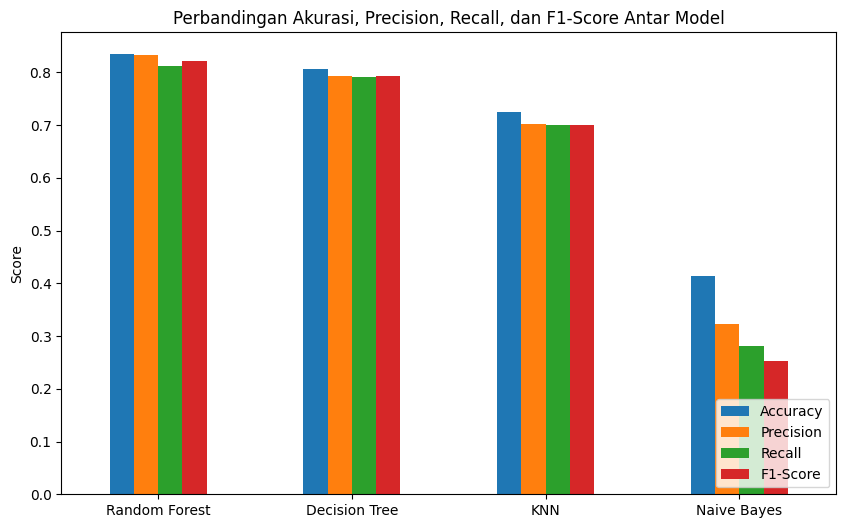

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 2

In [52]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=2)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 2)
Shape test PCA: (8238, 2)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.74      0.76      0.75      1758
           2       0.70      0.67      0.68      1224
           3       0.71      0.62      0.66       928
           4       0.71      0.70      0.70      1141
           5       0.77      0.81      0.79      3187

    accuracy                           0.74      8238
   macro avg       0.72      0.71      0.72      8238
weighted avg       0.74      0.74      0.74      8238



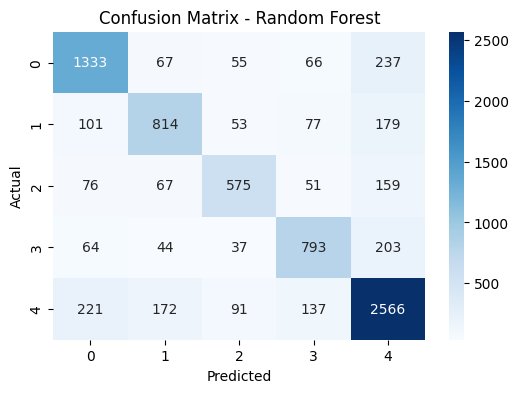


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.72      0.75      0.74      1758
           2       0.65      0.63      0.64      1224
           3       0.64      0.59      0.62       928
           4       0.65      0.70      0.67      1141
           5       0.78      0.76      0.77      3187

    accuracy                           0.71      8238
   macro avg       0.69      0.69      0.69      8238
weighted avg       0.71      0.71      0.71      8238



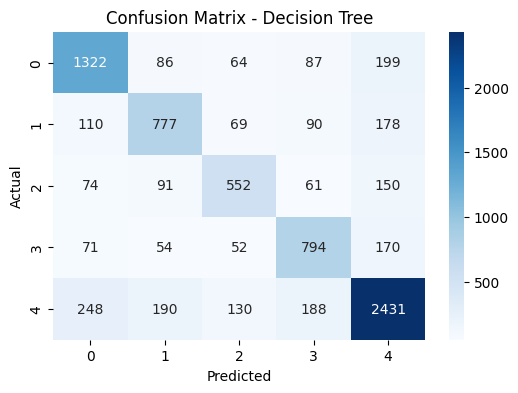


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.50      0.62      0.55      1758
           2       0.49      0.52      0.50      1224
           3       0.43      0.39      0.41       928
           4       0.45      0.38      0.41      1141
           5       0.66      0.62      0.64      3187

    accuracy                           0.54      8238
   macro avg       0.51      0.51      0.50      8238
weighted avg       0.55      0.54      0.54      8238



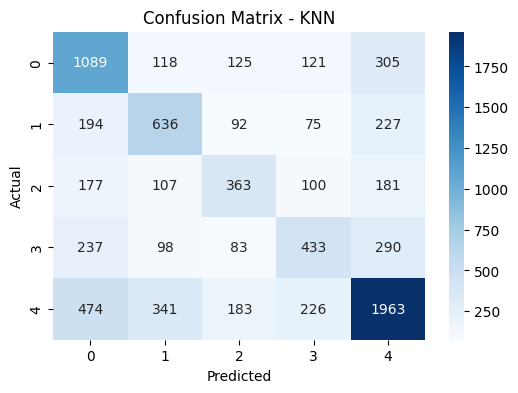


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.35      0.42      0.38      1758
           2       0.00      0.00      0.00      1224
           3       0.00      0.00      0.00       928
           4       0.00      0.00      0.00      1141
           5       0.40      0.76      0.52      3187

    accuracy                           0.38      8238
   macro avg       0.15      0.24      0.18      8238
weighted avg       0.23      0.38      0.28      8238



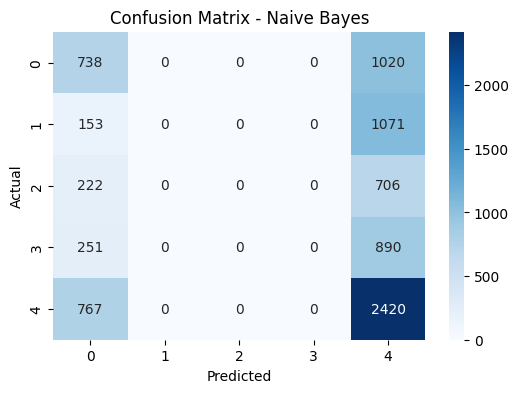


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.738165   0.724759  0.708609  0.715881
Decision Tree  0.713280   0.687527  0.688058  0.687420
KNN            0.544307   0.507032  0.505131  0.503755
Naive Bayes    0.383345   0.148517  0.235826  0.180060


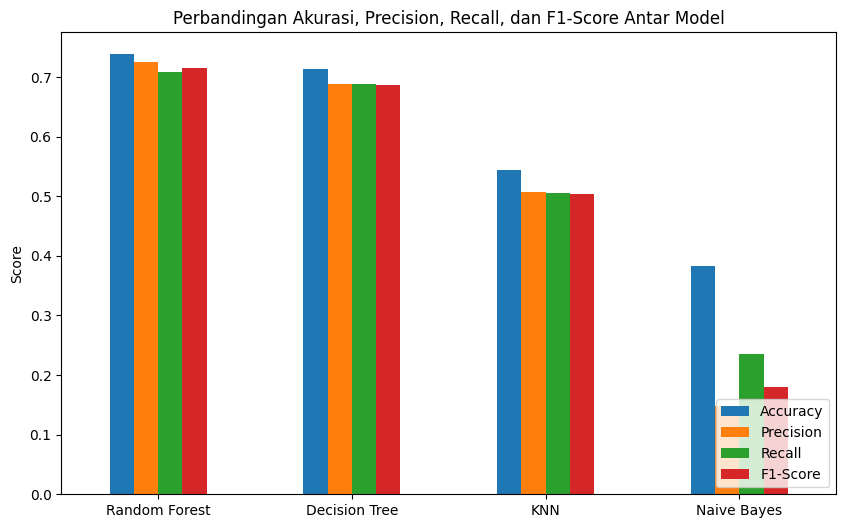

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()